### (finito, rivedi punto 4) Pdf of the log
1. Use `numpy` to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 

You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.
 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

plt.rc('text', usetex=True)  
plt.rc('font', family='serif')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
N = int(1e6) #samples
x = np.random.uniform(0.1, 10, N)

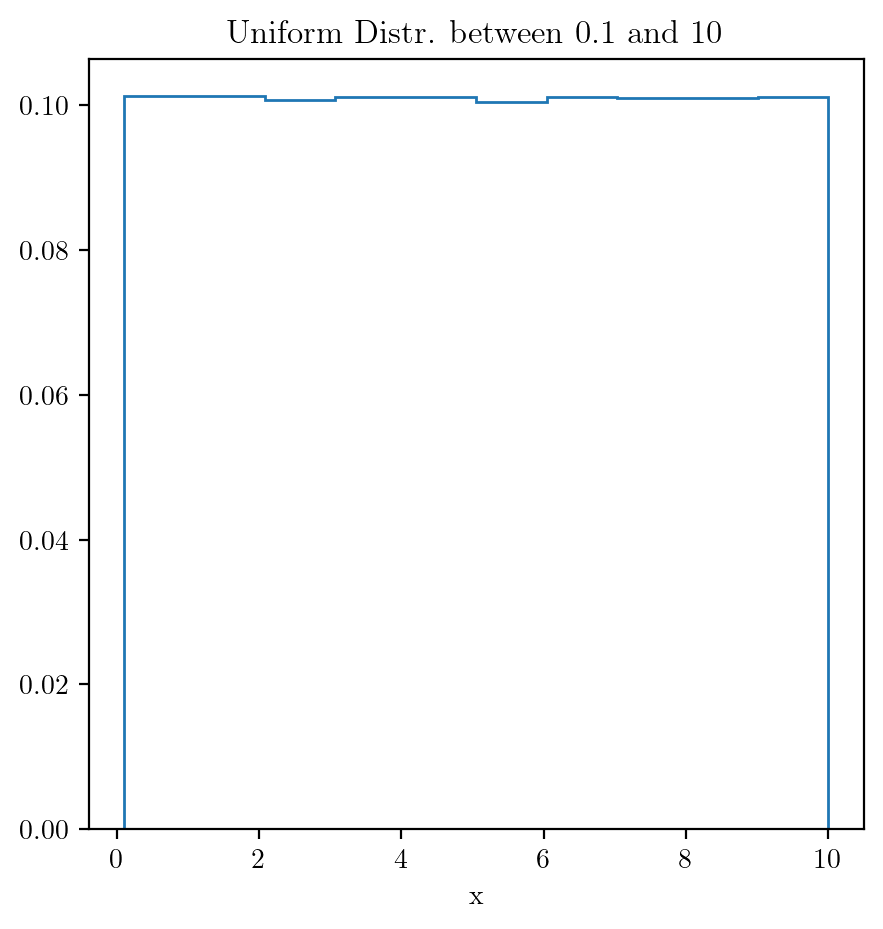

In [6]:
plt.figure(figsize=(5, 5))
plt.hist(x, density=True, histtype='step')
plt.title('Uniform Distr. between 0.1 and 10')
plt.xlabel('x')
plt.show()

In [7]:
y=np.log10(x)

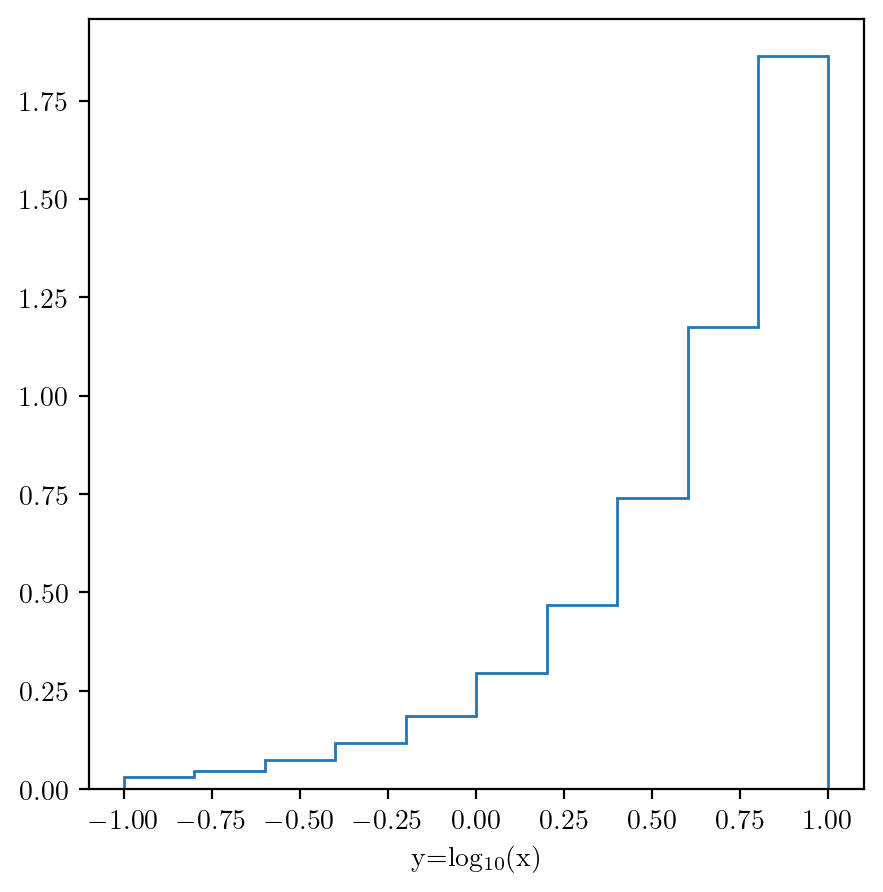

In [10]:
plt.figure(figsize=(5, 5))
plt.hist(y, density=True, histtype='step', label='unif distr between 0.1 and 10')
plt.xlabel('y=log$_{10}$(x)')
plt.show()

Compute the pdf of y

I have x with $p(x) = \frac{1}{10-0.1}$

I want $ p(y) = |\frac{dx}{dy}| p(x) $

$y=\log_{10} x$  $\longrightarrow$  $x=10^y$

$\frac{dx}{dy} = 10^y \ln(10)$

$\longrightarrow$ $p(y) =10^y \log(10) /(10-0.1)$

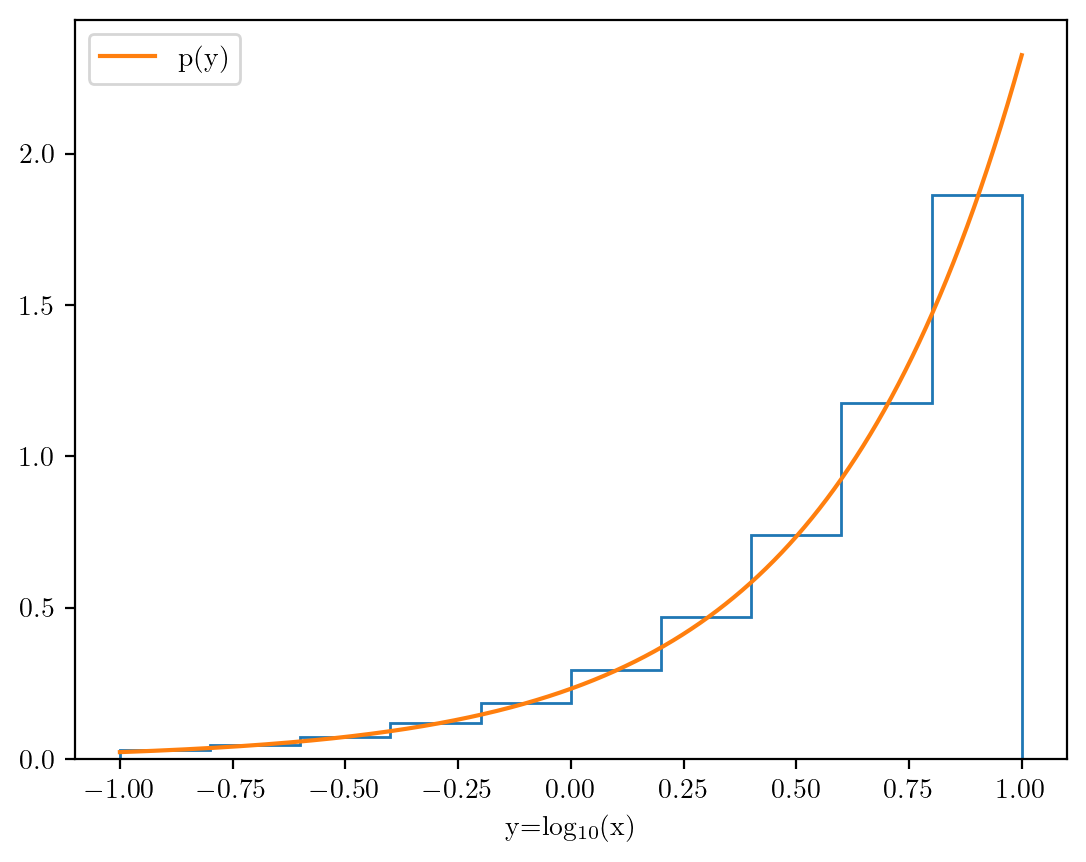

In [12]:
def p(y): 
    return 10**y * np.log(10)/(10-0.1)

y2 = np.linspace(-1,1, len(y))
py = p(y2)

plt.hist(y, density=True,histtype='step')
plt.plot(y2, py, label='p(y)')
plt.xlabel('y=log$_{10}$(x)')
plt.legend()
plt.show()

In [16]:
#5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 

mean_x=np.log10(np.mean(x))
median_x=np.log10(np.median(x))

mean_y=np.mean(y)
median_y=np.median(y)

print('Log of mean of x =', mean_x,'\nMean of log of x =', mean_y, '\nLog of Median of x =', median_x, '\nMedian of log of x', median_y)


Log of mean of x = 0.7032034150819586 
Mean of log of x = 0.5855608425237792 
Log of Median of x = 0.7028866619159874 
Median of log of x 0.7028866619159821
